   ## Tumor response to drug testing
   ### Summary of Results 
   
#### Drugs Tested
```  
Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn
Zoniferol   
```
  
Results of testing show there are two drugs with a significant response.

* Of the drugs tested, **Capomulin and Ramicane** reduced the size of tumor growth while also decreasing metastatic sites and increasing survival rates.

**Survival Rates**<br/>
While the majority of the drugs tested for a period of 45 days had a survival rate of less than 60% (going as low as 30%), Capomulin and Ramicane both had survival rates over 80% with Capomulin slightly higher.

**Tumor Growth**<br/>
During the test periods most drugs had no impact on slowing tumor growth. The results for Capomulin and Ramicane both not only stopped growth but also lead to a decrease in tumor size. Here Ramicane performed a little better in this test sample with a average reduction of volume over the 45 day period of 22% as compared to 19% in Capomulin.

**Metastatic Response**<br/>
Results of Metastatic Response were less dramatic across the drugs tested, though Capomulin and Ramicane still had the best results with each of reducing metastatic sites by half of the placebo control. Here the results for Ramicane were slightly better though the results overlap when you account for statistical error.





### Dependencies and Setup

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

### Pull in data from CSV files

In [2]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


* Read the Mouse and Drug Data

In [3]:
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
#Printing header for DataFrame
mouse_drug_data.columns

Index(['Mouse ID', 'Drug'], dtype='object')

* Read the Clinical Trial Data

In [5]:
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
# Merge two dataframes using an inner join ### Inner Join is default but still called out here
pymaceuticals_df = pd.merge(clinical_trial_data, mouse_drug_data, on = "Mouse ID", how = "inner")

# Display the data table for preview
pymaceuticals_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [7]:
#Printing header for DataFrame
pymaceuticals_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')

## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_grouped = pymaceuticals_df.groupby(['Drug','Timepoint'])

# Calculate means

mean_output = tumor_volume_grouped['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_df = pd.DataFrame(mean_output)
# Preview DataFrame
mean_df.reset_index()
mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_output = tumor_volume_grouped['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
temp_sem_df = pd.DataFrame(sem_output)

#Rename Header
sem_df = temp_sem_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume SEM'})

# Preview DataFrame
sem_df.head()

Tumor Volume SEM
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.448593
          10                 0.702684
          15                 0.838617
          20                 0.909731

In [10]:
# Minor Data Munging to Re-Format the Data Frames###
temp_sem_df2 = sem_df.reset_index()
sem_compare_df = temp_sem_df2.pivot(index= 'Timepoint', columns='Drug')['Tumor Volume SEM']
sem_compare_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [11]:
# Minor Data Munging to Re-Format the Data Frames###
#Reset index of DF after grouping.
temp_mean_df = mean_df.reset_index()
#Create pivot table compare each drug mean value
pivot_mean_df = temp_mean_df.pivot(index= 'Timepoint', columns='Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
#pivot_mean_df.head()
tumor_plot_df = pivot_mean_df
tumor_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [12]:
#Since 'Timepoint' is not the index, using .index gives the 'Timepoint' data points.
timepoint_index = list(tumor_plot_df.index)

In [13]:
#Create a index object of drug names to iterate over.
#This is not a list but and object with list charateristics.
#Using list() to cast object to actual list works as well.
drug_names = pivot_mean_df.columns
drug_names

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

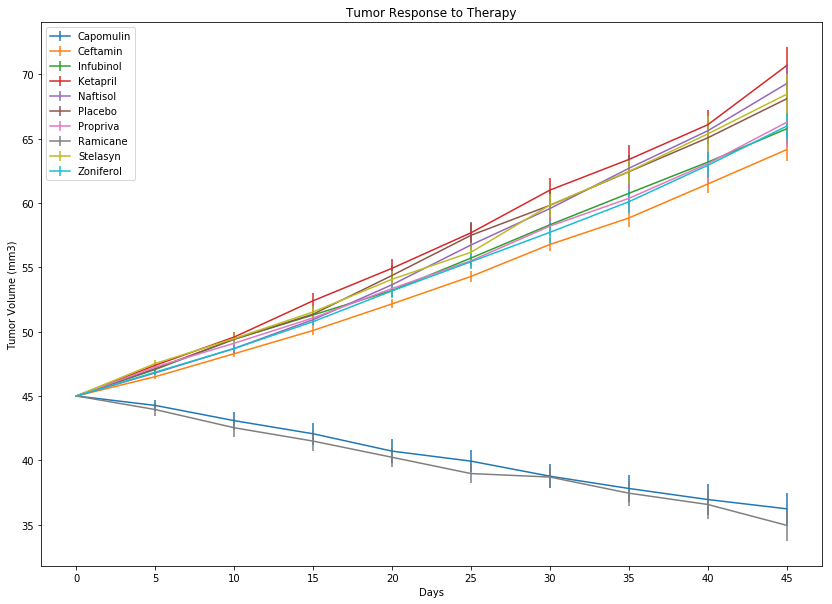

In [14]:
# # Generate the Plot (with Error Bars)

# Setting up the plot
plt.figure(figsize=(14,10))
for d in drug_names:
    plt.errorbar(x=timepoint_index, y=tumor_plot_df[d], yerr= sem_compare_df[d])
    
# # Add title, legend & labels to the x and y axes
plt.title("Tumor Response to Therapy")
plt.legend()
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Days')

#Customize x ticks 
plt.xticks(np.arange(0, tumor_plot_df.index.max()+3, 5))

#Save figure to output
plt.savefig("tumor_response.png")

#Show plot
plt.show()

## Metastatic Response to Treatment

In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_data_grouped = pymaceuticals_df.groupby(['Drug','Timepoint'])

# Calculate means
meta_mean = tumor_data_grouped['Metastatic Sites'].mean()

# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_mean)
# Preview DataFrame
meta_mean_df.reset_index()
meta_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [17]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
meta_sem_output = tumor_data_grouped['Metastatic Sites'].sem()

# Convert to DataFrame
temp_meta_df = pd.DataFrame(meta_sem_output)

#Rename Header
meta_sem_df = temp_meta_df.rename(columns={'Metastatic Sites':'Metastatic Sites SEM'})

# Preview DataFrame
meta_sem_df.head()

Metastatic Sites SEM
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.074833
          10                     0.125433
          15                     0.132048
          20                     0.161621

In [19]:
# Minor Data Munging to Re-Format the Data Frames###
#Reset index of DF after grouping.
temp_meta_mean_df = meta_mean_df.reset_index()

#Create pivot table compare each drug mean value
pivot_meta_mean_df = temp_meta_mean_df.pivot(index= 'Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
pivot_meta_mean_df.head()
meta_plot_df = pivot_meta_mean_df
meta_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [20]:
# Minor Data Munging to Re-Format the Data Frames###
temp_meta_sem_df = meta_sem_df.reset_index()
meta_sem_compare_df = temp_meta_sem_df.pivot(index= 'Timepoint', columns='Drug')['Metastatic Sites SEM']
meta_sem_compare_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [21]:
#Create a index object of drug names to iterate over.
#This is not a list but and object with list charateristics.
#Using list() to cast object to actual list works as well.
drug_names2 = pivot_meta_mean_df.columns
drug_names2

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [22]:
#Since 'Timepoint' is not the index, using .index gives the 'Timepoint' data points.
timepoint_index2 = list(meta_plot_df.index)
timepoint_index2

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

#### Generate the Plot (with Error Bars)

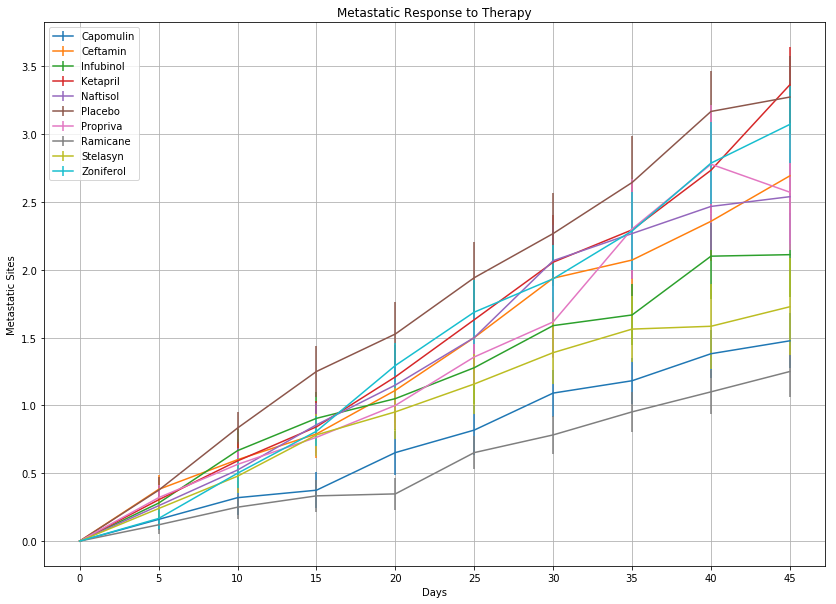

In [63]:
# Setting up the plot
plt.figure(figsize=(14,10))
for d in drug_names2:
    plt.errorbar(x=timepoint_index2, y=meta_plot_df[d], yerr= meta_sem_compare_df[d])
    
# # Add title, legend & labels to the x and y axes
plt.title("Metastatic Response to Therapy")
plt.legend()
plt.ylabel('Metastatic Sites')
plt.xlabel('Days')
plt.grid()

# #Customize x ticks 
plt.xticks(np.arange(0, meta_plot_df.index.max()+3, 5))

#Save figure to output
plt.savefig("metastatic_sites.png")

#Show the figure
plt.show()

## Survival Rates

* Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

* Convert to DataFrame

* Preview DataFrame

* Store the Mean Met. Site Data Grouped by Drug and Timepoint 
  * tumor_data_grouped = pymaceuticals_df.groupby(['Drug','Timepoint'])

* Calculate means
  * mouse_count = tumor_data_grouped['Metastatic Sites'].mean()

* Convert to DataFrame
  * mouse_count_df = pd.DataFrame(mouse_count)

* Preview DataFrame
  * mouse_count_df.reset_index()
  * mouse_count_df.head()

In [25]:
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [26]:
## Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
tumor_data_grouped = pymaceuticals_df.groupby(['Drug','Timepoint'])

mouse_count=pd.DataFrame(tumor_data_grouped['Mouse ID'].count())
mouse_count.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [27]:
# Minor Data Munging to Re-Format the Data Frames###
temp_mouse_count = mouse_count.reset_index()
mouse_count_df = temp_mouse_count.pivot(index= 'Timepoint', columns='Drug')['Mouse ID']
mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [28]:
#Create starting reference for mouse survival rate
start_count = mouse_count_df.iloc[0]
start_count

Drug
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     26
Ramicane     25
Stelasyn     26
Zoniferol    25
Name: 0, dtype: int64

```
# Subtract 1 from row, for each row in df.year
df['previous_year'] = [row-1 for row in df['year']]
```

In [29]:
#Create data frame the mesures survival rate in percentage.
mouse_percent_df= mouse_count_df
for d in drug_names2:
    mouse_percent_df[d]= [int(round((row/start_count[d])*100)) for row in mouse_count_df[d]]

mouse_percent_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100,100,100,100,100,100,100,100,100,100
5,100,84,100,92,92,96,96,100,96,96
10,100,80,84,88,84,96,88,96,88,88
15,96,76,84,76,84,80,65,96,88,84
20,92,72,80,76,80,76,65,92,81,68
25,88,72,72,76,72,68,54,92,73,64
30,88,64,68,72,60,60,50,92,69,60
35,88,56,48,68,60,56,38,84,62,56
40,84,56,40,60,60,48,35,80,46,56


<Figure size 720x720 with 0 Axes>

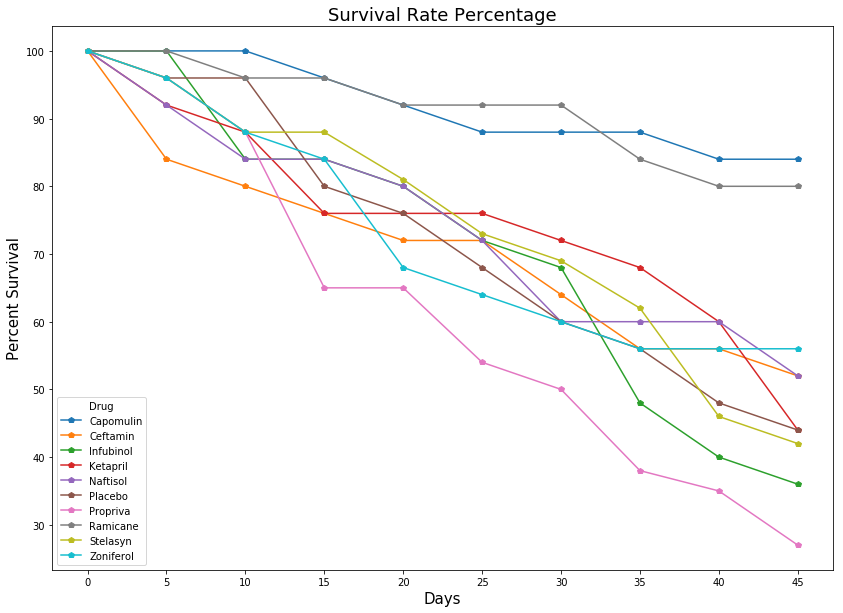

In [34]:
# # Generate the Plot (with Error Bars)

# Setting up the plot
plt.figure(figsize=(10,10))
#plt.scatter(x=timepoint_index2, y=mouse_percent_df['Capomulin'])
mouse_percent_df.plot(figsize=(14,10), legend=True, marker='p')
#plt.plot(x=timepoint_index2, y= mouse_percent_df['Capomulin'])
plt.xticks(np.arange(0, mouse_percent_df.index.max()+3, 5))
# # Add title, legend & labels to the x and y axes
plt.title('Survival Rate Percentage',fontdict = {'fontsize': 18})
#plt.legend()

plt.ylabel('Percent Survival', fontdict = {'fontsize': 15})
plt.xlabel('Days', fontdict = {'fontsize': 15})

# #Customize x ticks 
#plt.xticks(np.arange(0, meta_plot_df.index.max()+3, 5))

#Save figure to output
plt.savefig("survival_rate.png")

#Show the figure
plt.show()

In [35]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [36]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure


## Summary Bar Graph

* Calculate the percent changes for each drug

* Display the data to confirm


In [40]:
tumor_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [39]:
drug_names

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [45]:

# Calculate the percent changes for each drug
# list of drugs_names from previous work in notebook.
drug_effect_dict ={}

for drug in drug_names: # Loops through lists of Drugs 
    # Calculates the differance between the last timepoint and first timepoint.
    tumor_diff = tumor_plot_df.loc[45,drug] - tumor_plot_df.loc[0,drug] 
    # Calculates the % difference.
    percent_diff = round(tumor_diff / tumor_plot_df.loc[0,drug] * 100, 0)
    #Adds drug and percent change to a dict.
    drug_effect_dict[drug] = percent_diff 


# Display the data to confirm
drug_effect_dict

{'Capomulin': -19.0,
 'Ceftamin': 43.0,
 'Infubinol': 46.0,
 'Ketapril': 57.0,
 'Naftisol': 54.0,
 'Placebo': 51.0,
 'Propriva': 47.0,
 'Ramicane': -22.0,
 'Stelasyn': 52.0,
 'Zoniferol': 47.0}

In [46]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple =tuple(drug_effect_dict.items())
print(percent_change_tuple)

(('Capomulin', -19.0), ('Ceftamin', 43.0), ('Infubinol', 46.0), ('Ketapril', 57.0), ('Naftisol', 54.0), ('Placebo', 51.0), ('Propriva', 47.0), ('Ramicane', -22.0), ('Stelasyn', 52.0), ('Zoniferol', 47.0))


In [50]:
# Split the data into two catagories for tumor increase and tumor decrease.
tumor_decrease=[]
tumor_increase=[]

#Loops through the Tuple and separates positive and negative responses.
for d in range(len(percent_change_tuple)): 
    if(percent_change_tuple[d][1]<0):
        #Adds to negative growth (good) response.
        tumor_decrease.append(percent_change_tuple[d][0]) 
    else:
        #Adds to positive growth (bad) response.
        tumor_increase.append(percent_change_tuple[d][0])

tumor_increase
tumor_decrease

['Capomulin', 'Ramicane']

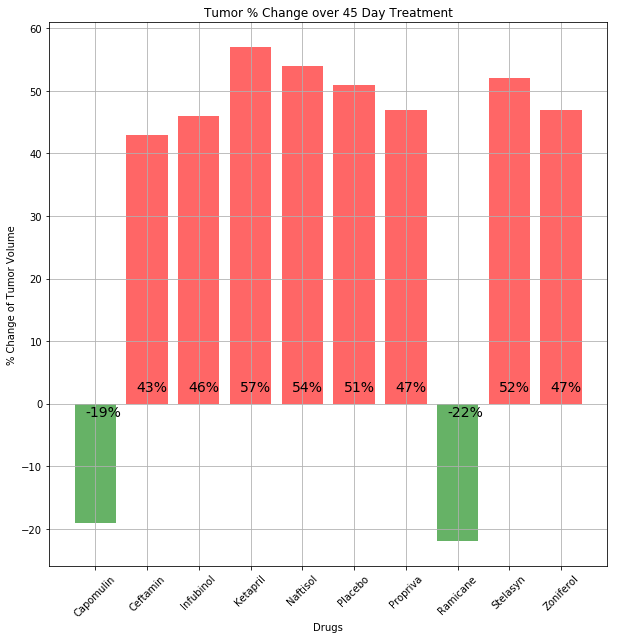

<Figure size 432x288 with 0 Axes>

In [62]:
#Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,10))

# Creates a list from number of drugs.
x_axis=np.arange(len(percent_change_tuple)) 

#Sets the correspond tick locations.
tick_locations=[value+.4 for value in x_axis] 

# Adds the bar graph ticks to the corresponding locations.
plt.xticks(tick_locations,drug_effect_dict.keys(), rotation='45') 
plt.ylabel('% Change of Tumor Volume')
plt.xlabel('Drugs')
plt.title('Tumor % Change over 45 Day Treatment')
plt.grid()

# This iterator sets the locations for the middle of bar graph.
i=0.4; 

# Loops through the Tuple and parses for the Drug/%Change. 
for drug, perct_change in percent_change_tuple: 
    #Checks if the drug had a good response.
    if drug in tumor_decrease:
        #Sets bar graph color to green.
        color='g' 
        #Sets the starting location for the text.
        text= -2 
    # Else represents drugs with poor response.
    else:
        #Sets the color of bar graph to red.
        color='r' 
        # Sets starting location for text.
        text= 2 
    #Plots the bar onto the graph.
    plt.bar(i, height= perct_change , color= color, alpha= .6) 
    #Adds the Text label for the % change for each bar graph.
    plt.text(i-.2, y= text, s= f"{perct_change:.0f}%", color= 'k' , fontsize= 14) 
    #Iterates to the next spot to place the bar.
    i=i+1 
        
# Save the Figure
plt.savefig('PercentChange.png')

# Show the Figure
plt.show()
plt.tight_layout()